<a href="https://colab.research.google.com/github/amirulnizaam/fyp_amirulnizaam/blob/main/FYP_AMIRUL_NIZAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/ROP_data .csv')

# Select the required columns
df = df[['Depth', 'WOB', 'SURF_RPM', 'ROP_AVG', 'PHIF', 'VSH', 'SW']]

# Handle missing values
df = df.dropna()  # Drop rows with missing values

# Handle outliers
z_scores = (df[['Depth', 'WOB', 'SURF_RPM', 'ROP_AVG', 'VSH', 'SW']] - df[['Depth', 'WOB', 'SURF_RPM', 'ROP_AVG', 'VSH', 'SW']].mean()) / df[['Depth', 'WOB', 'SURF_RPM', 'ROP_AVG', 'VSH', 'SW']].std()
df = df[(z_scores.abs() < 3).all(axis=1)]  # Keep rows where the absolute Z-score is less than 3

# Convert VSH and SW to percentage
df['VSH'] *= 100
df['SW'] *= 100

# Assuming PHIF is in decimal format, convert it to a manipulated variable between 0 and 100
df['PHIF'] = df['PHIF'] * 100

# Print the preprocessed data
print(df)

      Depth        WOB  SURF_RPM   ROP_AVG      PHIF        VSH          SW
3    3320.0  54793.206  1.593931  0.005419  4.349766  11.003981  100.000000
4    3325.0  50301.579  1.653262  0.005435  3.525224  12.080771  100.000000
5    3330.0  56835.194  1.657450  0.004738  1.596513   8.556492  100.000000
6    3335.0  37638.028  2.139238  0.008812  4.624312  10.985897  100.000000
7    3340.0  37638.028  2.139238  0.008812  4.123656   7.136826  100.000000
..      ...        ...       ...       ...       ...        ...         ...
146  4065.0  71081.752  2.104258  0.008808  8.773843  29.158569  100.000000
147  4070.0  72756.626  2.333038  0.008824  1.942371  50.317481  100.000002
148  4075.0  83526.789  2.333326  0.008799  5.468259  68.964007  100.009798
149  4080.0  84496.549  2.334673  0.008375  2.285700  64.010001  100.000000
150  4085.0  86658.559  2.331339  0.008454  2.285700  64.010000  100.000000

[136 rows x 7 columns]


<Axes: >

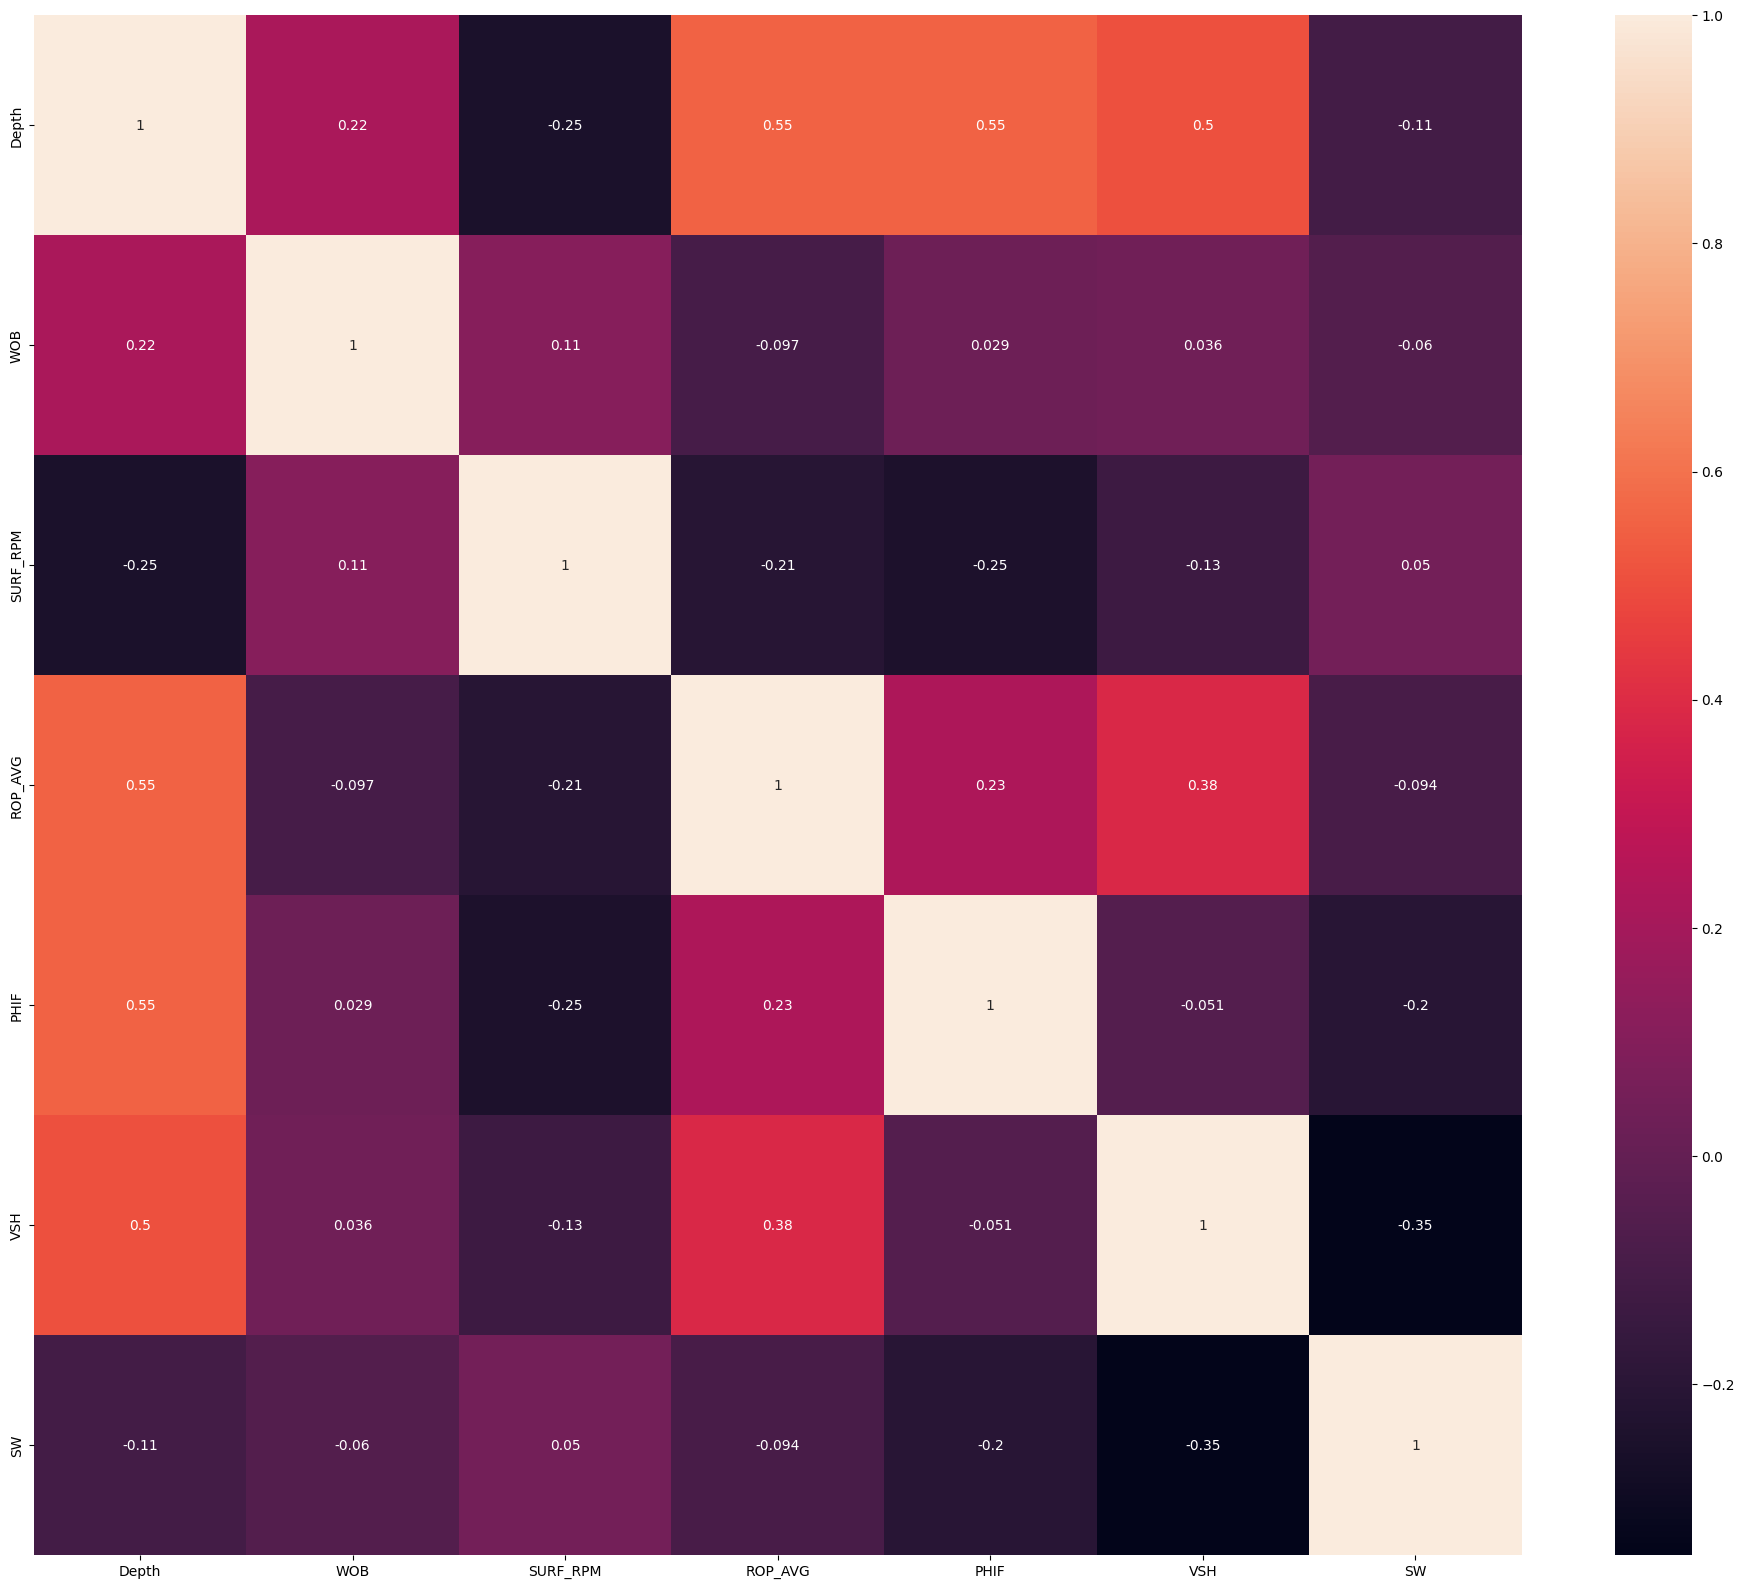

In [ ]:
fig, ax = plt.subplots(figsize=(24,20))
sns.heatmap(df.corr(), annot=True, ax=ax)

Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df[['Depth', 'WOB', 'SURF_RPM', 'ROP_AVG', 'PHIF']]
y = df[['VSH', 'SW']]

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
#Features for the training set
X_train

,Depth,WOB,SURF_RPM,ROP_AVG,PHIF
136,4015.0,62886.437,2.001217,0.007288,20.031278
47,3550.0,25216.418,2.002179,0.008813,6.602221
78,3715.0,39579.177,2.001536,0.009190,3.616791
60,3625.0,17368.556,2.001233,0.008928,4.252008
24,3435.0,49582.124,1.999640,0.007166,5.496614
...,...,...,...,...,...
66,3655.0,36926.625,1.997408,0.008827,4.483478
91,3780.0,31621.430,1.998425,0.008751,6.322954
117,3910.0,26972.945,1.999560,0.008814,8.728697
6,3335.0,37638.028,2.139238,0.008812,4.624312


In [ ]:
#Target variables (VSH and SW) for the training set
y_train

,VSH,SW
136,13.742446,100.001720
47,15.184274,100.000000
78,29.487536,100.000000
60,19.101571,99.953342
24,6.773942,100.000000
...,...,...
66,38.771560,100.000000
91,43.638287,100.000000
117,92.993699,100.000000
6,10.985897,100.000000


In [ ]:
#Features for the validation set
X_val

,Depth,WOB,SURF_RPM,ROP_AVG,PHIF
83,3740.0,39286.239,1.998018,0.005870,5.665974
63,3640.0,39125.127,1.999697,0.008082,4.760377
92,3785.0,39829.291,1.998904,0.008715,6.571109
45,3540.0,45256.052,2.000045,0.008822,6.619521
149,4080.0,84496.549,2.334673,0.008375,2.285700
87,3760.0,46129.405,2.000119,0.008010,2.782099
129,3980.0,45641.461,1.999408,0.008636,4.494321
86,3755.0,38222.463,1.999374,0.008717,1.717644
95,3800.0,45979.692,1.998498,0.008005,6.895378
134,4005.0,77870.783,1.999769,0.008149,23.536316


In [ ]:
#Target variables (VSH and SW) for the validation set
y_val

,VSH,SW
83,37.934503,100.000000
63,22.402310,100.000000
92,43.637038,100.000000
45,9.611303,100.000000
149,64.010001,100.000000
87,27.234899,100.000000
129,23.628334,99.999404
86,22.845915,100.000000
95,39.952036,100.000000
134,15.757988,99.324823


In [ ]:
#Features for the testing set
X_test

,Depth,WOB,SURF_RPM,ROP_AVG,PHIF
81,3730.0,66499.772,1.997621,0.008153,4.162914
53,3590.0,53818.568,1.996797,0.008731,4.116710
68,3665.0,48944.501,2.000008,0.008804,4.047139
50,3565.0,50070.063,2.001193,0.008164,4.642912
143,4050.0,48561.640,1.979767,0.008101,21.090879
70,3675.0,48287.015,2.000146,0.008824,5.506628
15,3380.0,29439.337,2.545853,0.007380,2.648212
89,3770.0,55013.203,1.999591,0.008011,2.082932
22,3425.0,60347.172,2.378377,0.006710,4.863377
72,3685.0,34623.502,2.000077,0.008162,5.804828


In [ ]:
#Target variables (VSH and SW) for the testing set
y_test

,VSH,SW
81,30.898511,100.000000
53,21.217789,100.000000
68,26.283337,100.000000
50,24.154044,99.512027
143,16.089677,100.000000
70,36.109659,100.000000
15,8.797616,100.000000
89,17.678375,100.000000
22,8.639947,100.000000
72,39.098552,100.000000


In [ ]:
df.shape


(136, 7)

In [ ]:
#view of dataset

df.head(30)
df.tail(30)


,Depth,WOB,SURF_RPM,ROP_AVG,PHIF,VSH,SW
120,3925.0,45694.986,1.999013,0.007998,5.443239,76.107683,100.000000
121,3940.0,34610.165,1.996543,0.008718,8.846727,38.269802,100.000000
122,3945.0,51089.580,2.033445,0.008626,2.587574,25.593601,100.000000
123,3950.0,58211.326,2.002210,0.007312,5.927428,34.555423,100.000000
124,3955.0,86371.098,1.921884,0.009610,19.059067,16.691742,100.000030
126,3965.0,32720.292,1.999885,0.008006,22.234273,26.268814,100.269264
127,3970.0,29672.600,1.998493,0.008017,23.025518,18.379988,99.773214
128,3975.0,43582.533,1.885025,0.009138,25.891786,21.452431,94.185370
129,3980.0,45641.461,1.999408,0.008636,4.494321,23.628334,99.999404
130,3985.0,45390.125,1.998490,0.008724,21.310133,9.804532,100.000000


Feature selection

In [ ]:
# Calculate correlation coefficients
correlation_matrix = df[['Depth', 'WOB', 'SURF_RPM', 'ROP_AVG', 'PHIF', 'SW', 'VSH']].corr()
vsh_correlations = correlation_matrix['VSH']

# Display correlation coefficients
print("Correlation with VSH:")
print(vsh_correlations)

phif_correlations = correlation_matrix[['WOB', 'SURF_RPM', 'ROP_AVG']]
print("Correlation with PHIF:")
print(phif_correlations)

Correlation with VSH:
Depth       0.504994
WOB         0.036432
SURF_RPM   -0.132148
ROP_AVG     0.384530
PHIF       -0.050952
SW         -0.349966
VSH         1.000000
Name: VSH, dtype: float64
Correlation with PHIF:
               WOB  SURF_RPM   ROP_AVG
Depth     0.217929 -0.252669  0.554156
WOB       1.000000  0.108645 -0.097354
SURF_RPM  0.108645  1.000000 -0.209316
ROP_AVG  -0.097354 -0.209316  1.000000
PHIF      0.029348 -0.245507  0.226683
SW       -0.059578  0.049659 -0.094219
VSH       0.036432 -0.132148  0.384530


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Separate X and y
X = df[['WOB', 'SURF_RPM', 'ROP_AVG']]
y = df['PHIF']

# Fit Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create DataFrame with feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

print("Feature Importance for PHIF:")
print(feature_importances_df)

Feature Importance for PHIF:
    Feature  Importance
0       WOB    0.379969
1  SURF_RPM    0.362397
2   ROP_AVG    0.257634


Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [ ]:
# Define the algorithms and their hyperparameter ranges
algorithms = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Regression', SVR()),
    ('Multilayer Perceptron', MLPRegressor())
]

hyperparameters = [
    {},  # No hyperparameters for Linear Regression
    {'n_estimators': [10, 50, 100]},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    {'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)]}
]

# Perform cross-validation and evaluate models
for name, model in algorithms:
    print(f"Model: {name}")
    if name == 'Linear Regression':
        features = ['WOB', 'SURF_RPM', 'ROP_AVG', 'PHIF']
    else:
        features = ['WOB', 'SURF_RPM', 'ROP_AVG', 'PHIF', 'SW']
    X = df[features]
    y = df['VSH']

    # Hyperparameter tuning and cross-validation
    best_mse = float('inf')
    best_params = None
    for params in hyperparameters:
        scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
        avg_mse = scores.mean()
        if avg_mse < best_mse:
            best_mse = avg_mse
            best_params = params
    print(f"Best MSE: {best_mse}")
    print(f"Best Hyperparameters: {best_params}")

    # Train final model using best hyperparameters
    final_model = model
    final_model.fit(X, y)

    # Make predictions
    y_pred = final_model.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}")
    print()

Model: Linear Regression
Best MSE: 1473.1150128723734
Best Hyperparameters: {}
MSE: 432.9228058116004
MAE: 15.412714683799402
R-squared: 0.1833593834228756

Model: Random Forest
Best MSE: 1018.1314359594951
Best Hyperparameters: {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
MSE: 42.04112817785496
MAE: 3.9487593131744156
R-squared: 0.9206960400887214

Model: Support Vector Regression
Best MSE: 759.775929346273
Best Hyperparameters: {}
MSE: 596.6154805560486
MAE: 16.751821989257195
R-squared: -0.12542103894794066

Model: Multilayer Perceptron
Best MSE: 313911.67558847653
Best Hyperparameters: {'n_estimators': [10, 50, 100]}
MSE: 1030050.9132766316
MAE: 964.099775185458
R-squared: -1942.0286453657613



Model Evaluation

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
val_df = pd.read_csv("path/to/validation_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/validation_data.csv'

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have a validation dataset named 'val_df' and the selected features are stored in 'features'

# Split the data into features and target variables
X_val = val_df[features]
y_val = val_df['VSH']

# Create a dictionary to store the evaluation results
evaluation_results = {}

# Evaluate each model on the validation set
for name, model in algorithms:
    # Make predictions on the validation set
    y_pred_val = model.predict(X_val)

    # Calculate evaluation metrics
    mae_val = mean_absolute_error(y_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # Calculate the maximum value of VSH achieved by the model
    max_vsh = np.max(y_pred_val)

    # Store the evaluation results in the dictionary
    evaluation_results[name] = {'MAE': mae_val, 'RMSE': rmse_val, 'Max VSH': max_vsh}

# Print the evaluation results
for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    print(f"MAE: {metrics['MAE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"Max VSH: {metrics['Max VSH']}")
    print()

NameError: name 'val_df' is not defined